# Titanic Kaggle Competition

## Loading data

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [3]:
titanic = pd.read_csv("titanic_data.csv", dtype={'Pclass': 'category'})
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Assessing data

Non-survived vs Survived passengers count

In [4]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Missing values: Age, Cabin, Embarked

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB


Finding missing values: Age, Cabin and Embarked

In [6]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Unique values: relevant for Survived, Pclass, Sex. Probably SibSp & Parch?

In [7]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Exploratory data analysis

Descriptive statistics on numerical variables

In [8]:
titanic.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


### Descriptive stats on numerical data groupped by Survival

Survival vs Age, SibSp, Parch: no apparent correlation (young children tended to survive more)


Survival vs Fare: Higher Fare seems to be correlated with Survival

In [9]:
titanic[titanic["Survived"] == 0].describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,549.000000,549.0,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,74.000000,8.000000,6.000000,263.000000


In [10]:
titanic[titanic["Survived"] == 1].describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,342.000000,342.0,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,80.000000,4.000000,5.000000,512.329200


/home/natasha/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/natasha/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


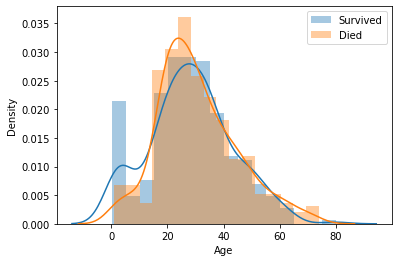

In [24]:
fig, ax = plt.subplots()

sns.distplot(titanic[titanic["Survived"] == 1]["Age"],label="Survived")
sns.distplot(titanic[titanic["Survived"] == 0]["Age"],label="Died")
plt.legend();

/home/natasha/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/natasha/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


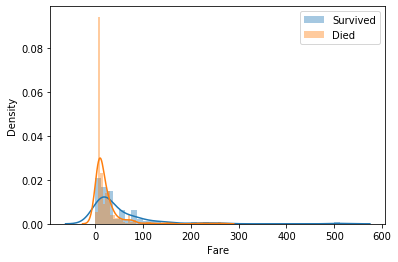

In [27]:
fig, ax = plt.subplots()

sns.distplot(titanic[titanic["Survived"] == 1]["Fare"],label="Survived")
sns.distplot(titanic[titanic["Survived"] == 0]["Fare"],label="Died")
plt.legend();

In [33]:
skew(titanic[titanic["Survived"] == 1]["Fare"])

3.8458166819167294

In [34]:
skew(titanic[titanic["Survived"] == 0]["Fare"])

4.540690741165962

/home/natasha/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/natasha/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


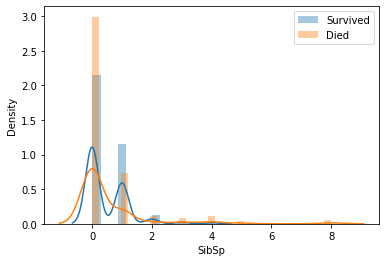

In [29]:
fig, ax = plt.subplots()

sns.distplot(titanic[titanic["Survived"] == 1]["SibSp"],label="Survived")
sns.distplot(titanic[titanic["Survived"] == 0]["SibSp"],label="Died")
plt.legend();

In [35]:
skew(titanic[titanic["Survived"] == 1]["SibSp"])

1.9495689294982967

In [36]:
skew(titanic[titanic["Survived"] == 0]["SibSp"])

3.5062749125131742

/home/natasha/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/natasha/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


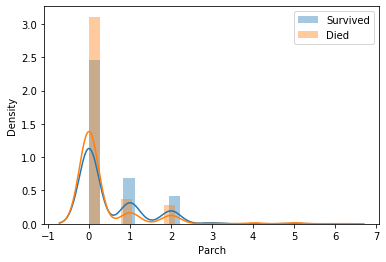

In [31]:
fig, ax = plt.subplots()

sns.distplot(titanic[titanic["Survived"] == 1]["Parch"],label="Survived")
sns.distplot(titanic[titanic["Survived"] == 0]["Parch"],label="Died")
plt.legend();

### Descriptive stats on categorical data groupped by Survival

Survival vs Sex: women survival rate is higher than for men

In [19]:
pd.crosstab(index=titanic["Survived"],columns=titanic["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


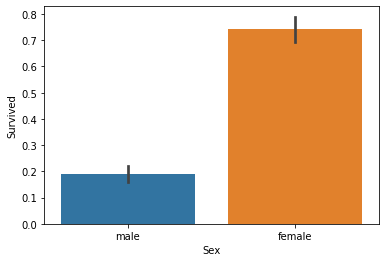

In [44]:
sns.barplot(x="Sex",y="Survived",data=titanic);

In [21]:
titanic.groupby(["Survived","Sex"]).mean()

PassengerId        Age     SibSp     Parch       Fare
Survived Sex                                                          
0        female   434.851852  25.046875  1.209877  1.037037  23.024385
         male     449.121795  31.618056  0.440171  0.207265  21.960993
1        female   429.699571  28.847716  0.515021  0.515021  51.938573
         male     475.724771  27.276022  0.385321  0.357798  40.821484

Survival vs Pclass: more dead people in 3d class; more survived people in 1st class

In [22]:
pd.crosstab(index=titanic["Survived"],columns=titanic["Pclass"])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


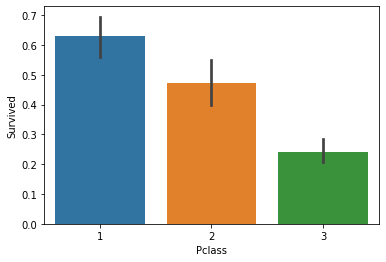

In [23]:
sns.barplot(x="Pclass",y="Survived",data=titanic);

In [24]:
titanic.groupby(["Survived","Pclass"]).mean()

PassengerId        Age     SibSp     Parch       Fare
Survived Pclass                                                       
0        1        410.300000  43.695312  0.287500  0.300000  64.684008
         2        452.123711  33.544444  0.319588  0.144330  19.412328
         3        453.580645  26.555556  0.672043  0.384409  13.669364
1        1        491.772059  35.368197  0.492647  0.389706  95.608029
         2        439.080460  25.901566  0.494253  0.643678  22.055700
         3        394.058824  20.646118  0.436975  0.420168  13.694887

Survival vs Embarked: no apprarent correlation

In [25]:
pd.crosstab(index=titanic["Survived"],columns=titanic["Embarked"])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


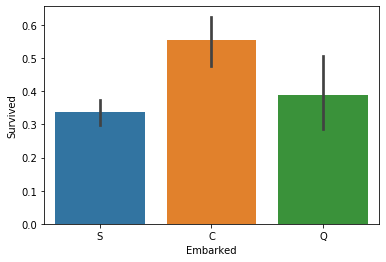

In [26]:
sns.barplot(x="Embarked",y="Survived",data=titanic);

In [27]:
titanic.groupby(["Survived","Embarked"]).mean()

PassengerId        Age     SibSp     Parch       Fare
Survived Embarked                                                       
0        C          409.853333  33.666667  0.253333  0.253333  35.443335
         Q          480.404255  30.325000  0.510638  0.276596  13.335904
         S          449.868852  30.203966  0.611241  0.348946  20.743987
1        C          473.989247  28.973671  0.494624  0.451613  79.720926
         Q          319.966667  22.500000  0.300000  0.000000  13.182227
         S          448.857143  28.113184  0.493088  0.539171  39.547081

## Preprocessing data

## Correlations

## Models